In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2, linewidth=75)
torch.manual_seed(123)

In [3]:
from torchvision import datasets
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True) # <1>
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True) # <2>

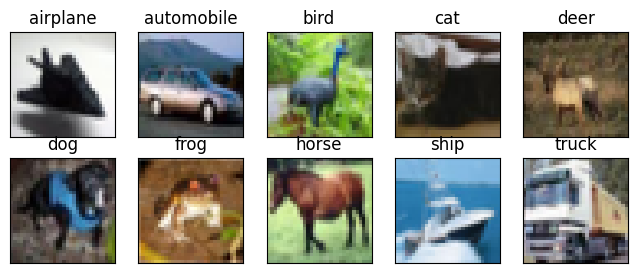

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()

In [5]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [6]:
len(cifar10)

50000

In [7]:
img, label = cifar10[90]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 2, 'bird')

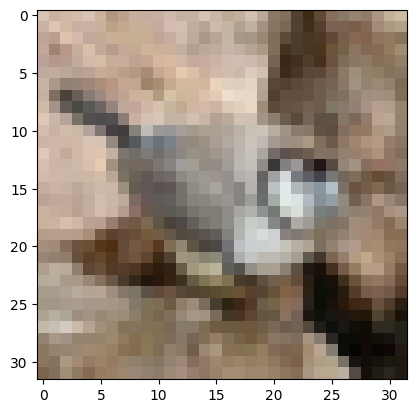

In [8]:
plt.imshow(img)
plt.show()

In [9]:
from torchvision import transforms
for i in range(len(dir(transforms))):
    print(dir(transforms)[i])

AugMix
AutoAugment
AutoAugmentPolicy
CenterCrop
ColorJitter
Compose
ConvertImageDtype
ElasticTransform
FiveCrop
GaussianBlur
Grayscale
InterpolationMode
Lambda
LinearTransformation
Normalize
PILToTensor
Pad
RandAugment
RandomAdjustSharpness
RandomAffine
RandomApply
RandomAutocontrast
RandomChoice
RandomCrop
RandomEqualize
RandomErasing
RandomGrayscale
RandomHorizontalFlip
RandomInvert
RandomOrder
RandomPerspective
RandomPosterize
RandomResizedCrop
RandomRotation
RandomSolarize
RandomVerticalFlip
Resize
TenCrop
ToPILImage
ToTensor
TrivialAugmentWide
__builtins__
__cached__
__doc__
__file__
__loader__
__name__
__package__
__path__
__spec__
_functional_pil
_functional_tensor
_presets
autoaugment
functional
transforms


In [10]:
from torchvision import transforms

to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape
# img_t

torch.Size([3, 32, 32])

In [11]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                          transform=transforms.ToTensor())

In [12]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [24]:
img_t.shape, img_t.dtype
img_t

tensor([[[-1.0055, -1.1960,  ...,  0.9156,  0.1852],
         [-0.9896, -1.1167,  ...,  0.7251,  0.3123],
         ...,
         [ 0.9156,  0.3916,  ...,  0.1535,  0.2805],
         [ 1.3284,  0.8997,  ...,  0.0741,  0.6933]],

        [[-0.9500, -1.1754,  ...,  0.9826,  0.2096],
         [-0.9339, -1.1271,  ...,  0.8216,  0.3706],
         ...,
         [ 0.3706, -0.0803,  ..., -0.0803,  0.0324],
         [ 0.8216,  0.4512,  ..., -0.0642,  0.5317]],

        [[-1.0484, -1.3182,  ..., -0.5687, -0.6286],
         [-1.1533, -1.3182,  ..., -0.5836, -0.5537],
         ...,
         [ 0.0460, -0.2838,  ..., -0.2389, -0.0590],
         [ 0.4507,  0.1359,  ..., -0.0440,  0.6906]]])

In [14]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

In [25]:
# plt.imshow(img_t)  # <1>
# plt.show()
img_t.permute(1, 2, 0).shape  # <2>

torch.Size([32, 32, 3])

In [31]:
img_t.permute(1, 2, 0)[0:6].shape

torch.Size([6, 32, 3])

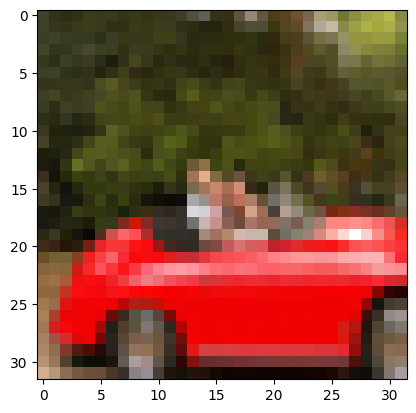

In [16]:
plt.imshow(img_t.permute(1, 2, 0))  # <1>
plt.show()

In [17]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [18]:
imgs.view(3, -1).mean(dim=1)  # <1>

tensor([0.4914, 0.4822, 0.4465])

In [19]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [20]:
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [21]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [22]:
transformed_cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9806982..2.126078].


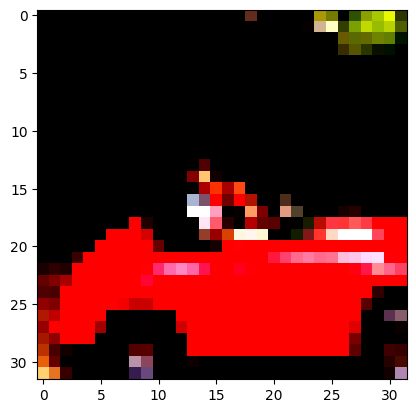

In [32]:
img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [33]:
img = torch.tensor([
    [[1, 2], [3, 4]],     # Red channel
    [[5, 6], [7, 8]],     # Green channel
    [[9, 10], [11, 12]]   # Blue channel
])

In [34]:
img.shape

torch.Size([3, 2, 2])

In [35]:
img.permute(1, 2, 0).shape

torch.Size([2, 2, 3])

In [36]:
img.permute(1, 2, 0)

tensor([[[ 1,  5,  9],
         [ 2,  6, 10]],

        [[ 3,  7, 11],
         [ 4,  8, 12]]])